# Package Imports and Settings

In [356]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import math
from sklearn.metrics import confusion_matrix
#from urllib.request import urlopen

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data from UCI

In [331]:
#url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data-numeric"
#url2 = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
#names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']
#raw_data = urlopen(url2)
#data = np.genfromtxt(raw_data)
#df = pd.DataFrame(data)

# Import Data Locally

In [332]:
data = pd.read_csv('../data/german_credit.csv')
data = data.apply(pd.to_numeric)

# Exploratory Data Analysis

In [333]:
#for i in range(0,len(data.columns)):
#    print(data.iloc[:,i].unique())

# Change Column Names

In [334]:
data = data.rename(columns={"Creditability": "classification", "Account Balance": "existingchecking", "Duration of Credit (month)": "duration", "Payment Status of Previous Credit": "credithistory", "Purpose": "purpose", "Credit Amount": "creditamount", "Value Savings/Stocks": "savings", "Length of current employment": "employmentsince", "Instalment per cent": "installmentrate", "Sex & Marital Status": "statussex", "Guarantors": "otherdebtors", "Duration in Current address": "residencesince", "Most valuable available asset": "property", "Age (years)": "age", "Concurrent Credits": "otherinstallmentplans", "Type of apartment": "housing", "No of Credits at this Bank": "existingcredits", "Occupation": "job", "No of dependents": "peopleliable", "Telephone": "telephone", "Foreign Worker": "foreignworker"})

In [335]:
data.head()

,classification,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


# Variable Explanations

- **classification**: 1 (credible), 0 (not)
- **existingchecking**: 1 (<0DM), 2 (0<=...<200DM), 3 (>=200DM), 4 (no checking account)
- **duration**: Duration of credit in months
- **credithistory**: 0 (no credits taken/all credits paid back duly), 1 (all credits at this bank paid back duly), 2 (existing credits paid back duly till now), 3 (delay in paying off in the past), 4 (critical account/other credits existing (not at this bank))
- **purpose**: 0 (car new), 1 (car used), 2 (furniture/equipment), 3 (radio/television), 4 (domestic appliances), 5 (repairs), 6 (education), 7 (vacation – does not exist), 8 (retraining), 9 (business), 10 (others)
- **creditamount**: credit amount (in DM)
- **savings**: 1 (<100DM), 2 (100<=...<500DM), 3 (500<=...<1000DM), 4 (>=1000DM), 5 (unknown/no savings account)
- **employmentsince**: 1 (unemployed), 2 (<1 year), 3 (1<=...<4 years), 4 (4<=...<7 years), 5 (>=7 years)
- **installmentrate**: installment rate in percentage of disposable income
- **statussex**: 1 (male divorced/separated), 2 (female divorced/separated/married), 3 (male single), 4 (male married/widowed), 5 (female single – does not exist)
- **otherdebtors**: 1 (none), 2 (co-applicant), 3 (guarantor)
- **residencesince**: present resident since (in years?)
- **property**: 1 (real estate), 2 (if not 1: building society savings agreement/life insurance), 3 (if not 1 or 2: car or other, not in savings attribute), 4 (unknown/no property)
- **age**: age in years
- **otherinstallmentplans**: 1 (bank), 2 (stores), 3 (none)
- **housing**: 1 (rent), 2 (own), 3 (for free)
- **existingcredits**: number of existing credits at this bank
- **job**: 1 (unemployed/unskilled – non-resident), 2 (unskilled – resident), 3 (skilled employee/official), 4 (management/self-employed/highly qualified employee/officer)
- **peopleliable**: number of people being liable to provide maintenance for
- **telephone**: 1 (none), 2 (yes, registered under the customer's name)
- **foreignworker**: 1 (yes), 2 (no)

# Compute Share of Credible Observations

In [336]:
share_credible = len(data[data.classification == 1])/len(data)
print(share_credible)

0.7


# Replace Values

To obtain ordinal variables, replace certain values.

In [337]:
data.existingchecking[data.existingchecking == 4] = 0 #Strong assumption that not having a checking account is worse than having a negative balance
data.savings[data.savings == 5] = 0
data.housing[data.housing == 3] = 0

# Define Sensitive (and Legitimate) plus Irrelevant Features

In [338]:
X = data.drop("classification",1)
y = data["classification"] 

In [339]:
X.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2


In [340]:
sensitive = ['statussex', 'age', 'foreignworker']
irrelevant = ['purpose', 'installmentrate', 'otherdebtors', 'otherinstallmentplans', 'existingcredits'] #TBC

In [341]:
X_legit = X.drop(sensitive,1)
X_legit = X_legit.drop(irrelevant,1)
X_legit.head()

,existingchecking,duration,credithistory,creditamount,savings,employmentsince,residencesince,property,housing,job,peopleliable,telephone
0,1,18,4,1049,1,2,4,2,1,3,1,1
1,1,9,4,2799,1,3,2,1,1,3,2,1
2,2,12,2,841,2,4,4,1,1,2,1,1
3,1,12,4,2122,1,3,2,1,1,2,2,1
4,1,12,4,2171,1,3,4,2,2,2,1,1


# Feature Scaling

Use feature scaling to adjust the importance of individual features w.r.t. maximizing utility. For now, assume all features are equally important. However, not knowing how the distribution of importances should be, we cannot compare the old and new decisions, only from a pure fairness perspective.

In [342]:
scaler = preprocessing.MinMaxScaler()
X_legit_scaled = scaler.fit_transform(X_legit)

In [343]:
pd.DataFrame(X_legit_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.333333,0.205882,1.0,0.043964,0.25,0.25,1.000000,0.333333,0.5,0.666667,0.0,0.0
1,0.333333,0.073529,1.0,0.140255,0.25,0.50,0.333333,0.000000,0.5,0.666667,1.0,0.0
2,0.666667,0.117647,0.5,0.032519,0.50,0.75,1.000000,0.000000,0.5,0.333333,0.0,0.0
3,0.333333,0.117647,1.0,0.103004,0.25,0.50,0.333333,0.000000,0.5,0.333333,1.0,0.0
4,0.333333,0.117647,1.0,0.105700,0.25,0.50,1.000000,0.333333,1.0,0.333333,0.0,0.0


# Correlation Analysis

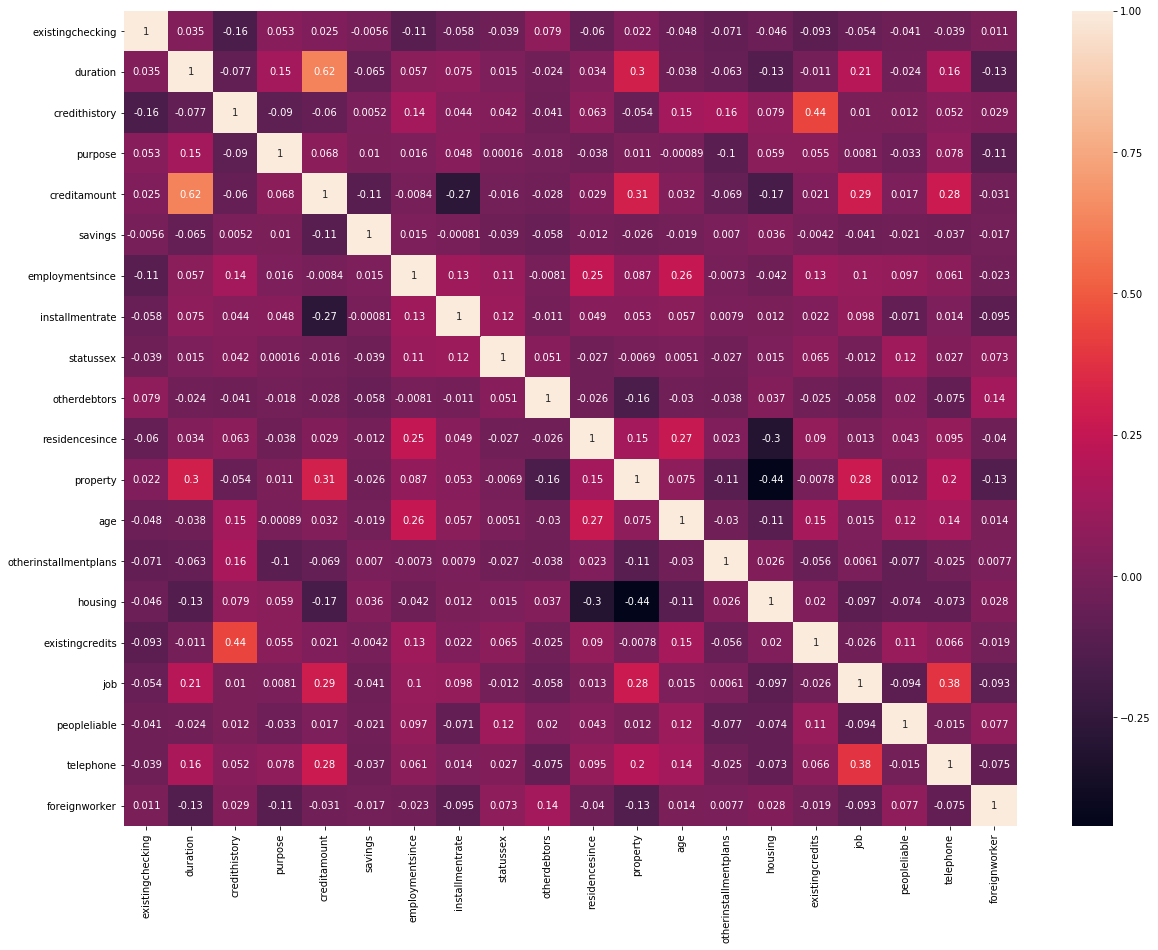

In [344]:
plt.figure(figsize=(20,15))
cor = X.corr()
sns.heatmap(cor, annot=True)
b, t = plt.ylim() #To work around a bug in visualization
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

# Defining North Star

We can either use the best observed value per feature as north star, or the best theoretically attainable value.

If we use the best observed, then we assume that unseen observations are not "better" than what has been seen, otherwise distance from the north star is not meaningful. However, we only use the method to determine labels for the **existing** data, for new data we do need ML after all. I.e., it is not practical to use the distance-based approach to label unseen observations. After feature scaling, the north star can be just 0 (min) or 1 (max) for each feature.

If we use the best theoretically attainable value, then first, it's hard to determine that in some cases, and second, how do we make sure the distances are not exploding?

In [345]:
north_star = [1,0,0,0,1,1,1,0,1,1,0,1]

# Compute Distances to North Star

In [346]:
temp = list()
for i in range(0,len(X_legit_scaled)):
    dist = np.linalg.norm(X_legit_scaled[i]-north_star)
    temp.append(dist)

In [347]:
data['distance'] = temp

In [348]:
data.head()

,classification,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,distance
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1,1,2.021382
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1,1,2.255566
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1,1,1.543682
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,1,2,2.328150
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,1,2,1.958957


# Sort by Distance

In [349]:
data = data.sort_values(by=['distance'])
data = data.reset_index(drop=True)

In [350]:
data.head()

,classification,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,distance
0,1,2,12,2,0,1318,4,5,4,3,1,4,1,54,3,2,1,3,1,2,1,0.699654
1,1,2,14,2,9,1410,3,5,1,4,1,2,1,35,3,2,1,3,1,2,1,1.002430
2,1,1,24,1,2,2483,3,3,4,3,1,4,1,22,2,2,1,3,1,2,1,1.015951
3,1,1,24,1,2,2828,3,3,4,3,1,4,1,22,2,2,1,3,1,2,1,1.018422
4,1,2,20,0,1,6148,2,5,3,4,1,4,3,31,1,2,2,3,1,2,1,1.037954


# Compute New Labels

In [351]:
temp = list()
cutoff = math.ceil(len(data)*share_credible)
for i in range(0,len(data)):
    if (i<cutoff):
        temp.append(1)
    else:
        temp.append(0)

In [352]:
data['classification_new'] = temp

In [360]:
data.head(1000)

,classification,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,residencesince,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,distance,classification_new
0,1,2,12,2,0,1318,4,5,4,3,1,4,1,54,3,2,1,3,1,2,1,0.699654,1
1,1,2,14,2,9,1410,3,5,1,4,1,2,1,35,3,2,1,3,1,2,1,1.002430,1
2,1,1,24,1,2,2483,3,3,4,3,1,4,1,22,2,2,1,3,1,2,1,1.015951,1
3,1,1,24,1,2,2828,3,3,4,3,1,4,1,22,2,2,1,3,1,2,1,1.018422,1
4,1,2,20,0,1,6148,2,5,3,4,1,4,3,31,1,2,2,3,1,2,1,1.037954,1
5,1,2,9,2,6,1199,1,4,4,2,1,4,2,67,3,2,2,4,1,2,1,1.051359,1
6,1,2,18,2,9,1913,4,2,3,4,1,3,1,36,1,2,1,3,1,2,1,1.093889,1
7,1,3,12,2,2,1424,0,5,3,2,1,4,1,55,3,2,1,4,1,2,1,1.126061,1
8,0,3,30,3,9,1908,1,5,4,3,1,4,1,66,3,2,1,4,1,2,1,1.131157,1
9,1,2,12,2,3,1092,1,3,4,2,3,4,1,49,3,2,2,3,1,2,1,1.140487,1


# Confusion Matrix: Original vs. New Labels

In [359]:
confusion_matrix(data.classification, data.classification_new)

array([[ 85, 215],
       [215, 485]])